# **Logistic Regression Example in Python: Step-by-Step Guide**

# By : Khirania Aya

# **Step #1: Import libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report


# **Step #2: Explore and Clean the Data**

The dataset we are going to use is a **[Heart Attack](https://www.kaggle.com/imnikhilanand/heart-attack-prediction/data?select=data.csv)** directory from Kaggle. **The goal of the project is to predict the binary target, whether the patient has heart disease or not**.

Upon downloading the csv file, we can use **read_csv** to load the data as a pandas DataFrame. We also specified **na_value = ‘?’** since **they represent missing values in the dataset**.

In [22]:
# https://www.kaggle.com/imnikhilanand/heart-attack-prediction/data?select=data.csv 
df = pd.read_csv('data.csv', na_values='?')

First, let’s take a look at the variables by calling the columns of the dataset.

In [23]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num       '],
      dtype='object')

This corresponds to the documentation on Kaggle that **14 variables** are available for analysis.

**'num** is the target, a value of 1 shows the presence of heart disease in the patient, otherwise 0.

Let’s rename the target variable num to target, and also print out the classes and their counts.

In [24]:
df = df.rename(columns={'num       ': 'target'})

df['target'].value_counts(dropna=False)

0    188
1    106
Name: target, dtype: int64

We can see that the dataset is only slightly imbalanced among classes of 0 and 1, so we’ll proceed without special adjustment.

Next, let’s take a look at the summary information of the dataset using **.info()**

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    int64  
 1   sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        3 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 32.3 KB


As you can see, there are 294 observations in the dataset and 13 other features besides target.

To keep the cleaning process simple, we’ll remove:

- the columns with many missing values, which are slope, ca, thal.
- the rows with missing values.

In [26]:
df = df.drop(['slope', 'ca', 'thal'], axis=1)

df = df.dropna().copy()

Let’s recheck the summary to make sure the dataset is cleaned.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       261 non-null    int64  
 1   sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    float64
 4   chol      261 non-null    float64
 5   fbs       261 non-null    float64
 6   restecg   261 non-null    float64
 7   thalach   261 non-null    float64
 8   exang     261 non-null    float64
 9   oldpeak   261 non-null    float64
 10  target    261 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 24.5 KB


The **ten features** we’ll be using are:

- **age:** age in years
- **sex:** sex (1 = male; 0 = female)
- **cp:** chest pain type
  - 1: typical angina
  - 2: atypical angina
  - 3: non-anginal pain
  - 4: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholesterol in mg/dl
- **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
- **thalach:** maximum heart rate achieved
- **exang:** exercise-induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest


We can also take a quick look at the data itself by printing out the dataset.

In [28]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


We have five :
- categorical variables: sex, cp, fbs, restecg, and exangfive
- numerical variables being the rest.

# **Step #3: Transform the Categorical Variables: Creating Dummy Variables**

When fitting logistic regression, we often transform the categorical variables into dummy variables.

In logistic regression models, encoding all of the independent variables as dummy variables allows easy interpretation and calculation of the odds ratios, and increases the stability and significance of the coefficients.

Among the five categorical variables, sex, fbs, and exang only have **two levels of 0 and 1**, so **they are already in the dummy variable format**. But we still need to convert cp and restecg into dummy variables.

Let’s take a closer look at these two variables.

In [29]:
df['cp'].value_counts(dropna=False)

df['restecg'].value_counts(dropna=False)

0.0    208
1.0     47
2.0      6
Name: restecg, dtype: int64

There are four classes for cp and three for restecg.

We can use the get_dummies function to convert them into dummy variables. The drop_first parameter is set to True so that the unnecessary first level dummy variable is removed.

In [30]:
df = pd.get_dummies(df, columns=['cp', 'restecg'], drop_first=True)

df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,1,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,1,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,1,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,1,0,0,0,0


As shown, the variable cp is now represented by three dummy variables cp_2, cp_3, and cp_4. cp_1 was removed since it’s not necessary to distinguish the classes of cp.

- when cp = 1: cp_2 = 0, cp_3 = 0, cp_4 = 0.
- when cp = 2: cp_2 = 1, cp_3 = 0, cp_4 = 0.
- when cp = 3: cp_2 = 0, cp_3 = 1, cp_4 = 0.
- when cp = 4: cp_2 = 0, cp_3 = 0, cp_4 = 1.

Similarly, the variable restecg is now represented by two dummy variables **restecg_1.0** and **restecg_2.0**.

To recap, we can print out the numeric columns and categorical columns as *numeric_cols* and *cat_cols below*.

In [31]:
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'target'})
cat_cols.sort()

print(numeric_cols)
print(cat_cols)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
['cp_2', 'cp_3', 'cp_4', 'exang', 'fbs', 'restecg_1.0', 'restecg_2.0', 'sex']


# **Step #4: Split Training and Test Datasets**

To make sure the fitted model can be generalized to unseen data, we always train it using some data while evaluating the model using the holdout data. So we need to split the original dataset into training and test datasets.

To do this, we can use the **train_test_split** method with the below specifications:

- **test_size = 0.2:** keep 20% of the original dataset as the test dataset, i.e., 80% as the training dataset.
- **stratify=df[‘target’]:** when the dataset is imbalanced, it’s good practice to do stratified sampling. In this way, both the training and test datasets will have similar portions of the target classes as the complete dataset.

To verify the specifications, we can print out the shapes and the classes of target for both the training and test sets.

In [32]:
random_seed = 888
df_train, df_test = train_test_split(df, test_size=0.2, random_state=random_seed, stratify=df['target'])


print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize=True))
print()
print(df_test['target'].value_counts(normalize=True))

(208, 14)
(53, 14)

0    0.625
1    0.375
Name: target, dtype: float64

0    0.622642
1    0.377358
Name: target, dtype: float64


# **Step #5: Transform the Numerical Variables: Scaling**

Before fitting the model, let’s also scale the numerical variables, which is another common practice in machine learning.

After creating a class of **StandardScaler**, we calculate **(fit)** the mean and standard deviation for scaling using df_train’s numeric_cols. Then we create a function get_features_and_target_arrays that:

- performs standardization on the numeric_cols of df to return the new array X_numeric_scaled. 
- transforms cat_cols to a NumPy array X_categorical.
- combines both arrays back to the entire feature array X.
- assigns the target column to y.

Then we can apply this function to the training dataset to output our training feature and target, X and y.

This step has to be done after the train test split since the scaling calculations are based on the training dataset.

In [33]:
scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

# **Step #6: Fit the Logistic Regression Mode**

Finally, we can fit the logistic regression in Python on our example dataset.

We first create an instance clf of the class **LogisticRegression**. Then we can fit it using the training dataset.

In [34]:
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

At this point, we have the logistic regression model for our example in Python!


# **Step #7: Evaluate the Model**

After fitting the model, let’s look at some popular evaluation metrics for the dataset.

Before starting, we need to get the scaled test dataset.


In [35]:
X_test, y_test = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

We can plot the **ROC curve**

In [53]:
from sklearn.metrics import RocCurveDisplay

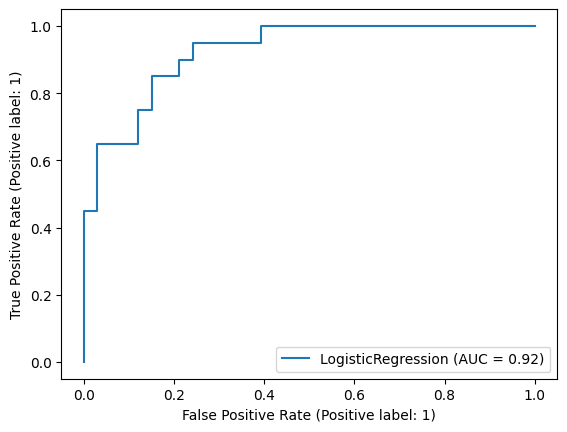

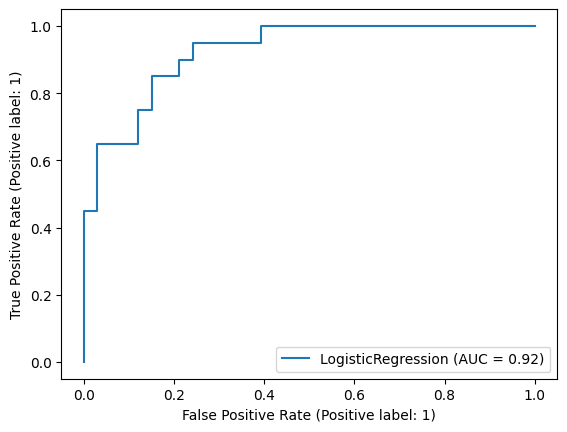

In [55]:
roc_display = RocCurveDisplay.from_estimator(clf, X_test, y_test)
roc_display.plot()
plt.show()

We can also plot the precision-recall curve.

In [56]:
from sklearn.metrics import PrecisionRecallDisplay

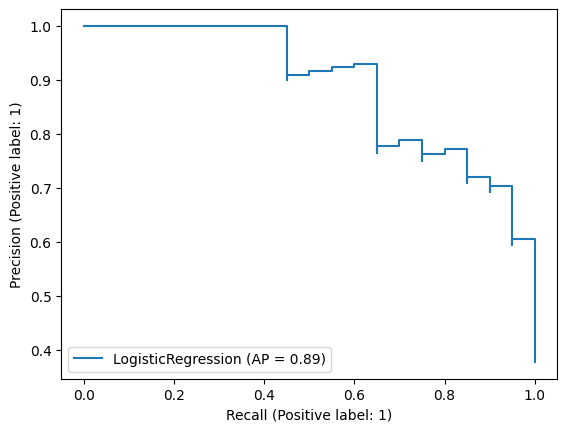

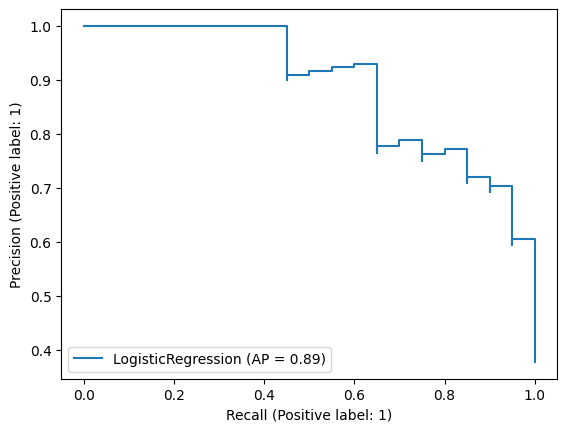

In [57]:
pr_display = PrecisionRecallDisplay.from_estimator(clf, X_test, y_test)
pr_display.plot()
plt.show()

To calculate other metrics, we need to get the prediction results from the test dataset:

- **predict_proba** to get the predicted probability of the logistic regression for each class in the model.
The first column of the output of predict_proba is P(target = 0), and the second column is P(target = 1). So we are calling for the second column by its index position 1.
- **predict** the test dataset labels by choosing the class with the highest probability, which means a threshold of 0.5 in this binary example.

In [58]:
test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

Using the below Python code, we can calculate some other evaluation metrics:

- **Log loss**
- **AUC**
- **Average Precision**
- **Accuracy**
- **Precision**
- **Recall**
- **F1 score**

Classification report, which contains some of the above plus extra information

In [61]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.35613
AUC = 0.92424
Average Precision = 0.89045

Using 0.5 as threshold:
Accuracy = 0.83019
Precision = 0.76190
Recall = 0.80000
F1 score = 0.78049

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.76      0.80      0.78        20

    accuracy                           0.83        53
   macro avg       0.82      0.82      0.82        53
weighted avg       0.83      0.83      0.83        53



Also, it’s a good idea to get the metrics for the training set for comparison, which we’ll not show in this tutorial. For example, if the training set gives accuracy that’s much higher than the test dataset, there could be overfitting.

To show the **confusion matrix**, we can plot a heatmap, which is also based on a threshold of 0.5 for binary classification.

Confusion Matrix


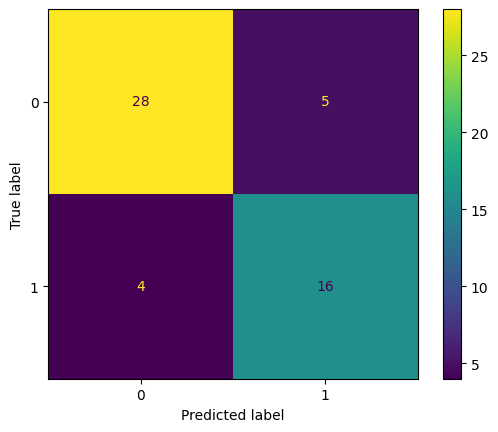

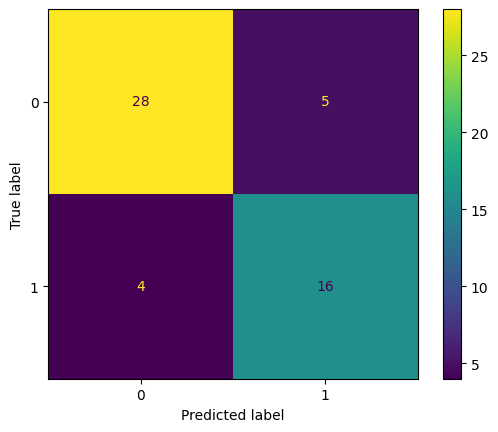

In [65]:
print('Confusion Matrix')
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
cm_display.plot()
plt.show()

# **Step #8: Interpret the Results**


In the last step, let’s interpret the results for our example logistic regression model. We’ll cover both the categorical feature and the numerical feature.

In [66]:
coefficients = np.hstack((clf.intercept_, clf.coef_[0]))
pd.DataFrame(data={'variable': ['intercept'] + cat_cols + numeric_cols, 'coefficient': coefficients})

,variable,coefficient
0,intercept,-0.178340
1,cp_2,-2.895253
2,cp_3,-1.808676
3,cp_4,-0.830942
4,exang,0.514580
5,fbs,1.514143
6,restecg_1.0,-0.638990
7,restecg_2.0,-0.429625
8,sex,1.290292
9,age,0.059633


For categorical feature sex, this fitted model says that holding all the other features at fixed values, the odds of having heart disease for males (sex=1) to the odds of having heart disease for females is exp(1.290292). You can derive it based on the logistic regression equation.

For categorical feature cp (chest pain type), we have created dummy variables for it, the reference value is typical angina (cp = 1). So the odds ratio of atypical angina (cp = 2) to typical angina (cp = 1) is exp(-2.895253).

Since the numerical variables are scaled by StandardScaler, we need to think of them in terms of standard deviations. Let’s first print out the list of numeric variable and its sample standard deviation.

In [67]:
pd.DataFrame(data={'variable': numeric_cols, 'unit': np.sqrt(scaler.var_)})

,variable,unit
0,age,7.909365
1,trestbps,18.039942
2,chol,63.470764
3,thalach,24.071915
4,oldpeak,0.891801


For example, holding other variables fixed, there is a 41% increase in the odds of having a heart disease for every standard deviation increase in cholesterol (63.470764) since exp(0.345501) = 1.41.

That’s it. You’ve discovered the general procedures of fitting logistic regression models with an example in Python.

Try to apply it to your next classification problem!